<a href="https://colab.research.google.com/github/TanzeelaAgha/Deep-learning-projects/blob/master/cats_and_dogs_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-07-19 17:49:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   157MB/s    in 0.4s    

2019-07-19 17:49:11 (157 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
train_cat_fnames = os.listdir(train_cats_dir)
#print train_cat_fnames[:10]

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
#print train_dog_fnames[:10]

print(train_cat_fnames)
#print(train_dog_fnames)

['cat.746.jpg', 'cat.147.jpg', 'cat.260.jpg', 'cat.242.jpg', 'cat.538.jpg', 'cat.938.jpg', 'cat.442.jpg', 'cat.991.jpg', 'cat.43.jpg', 'cat.911.jpg', 'cat.215.jpg', 'cat.941.jpg', 'cat.233.jpg', 'cat.81.jpg', 'cat.172.jpg', 'cat.148.jpg', 'cat.979.jpg', 'cat.218.jpg', 'cat.234.jpg', 'cat.123.jpg', 'cat.982.jpg', 'cat.736.jpg', 'cat.188.jpg', 'cat.541.jpg', 'cat.204.jpg', 'cat.133.jpg', 'cat.384.jpg', 'cat.36.jpg', 'cat.137.jpg', 'cat.175.jpg', 'cat.676.jpg', 'cat.348.jpg', 'cat.641.jpg', 'cat.583.jpg', 'cat.45.jpg', 'cat.186.jpg', 'cat.850.jpg', 'cat.626.jpg', 'cat.248.jpg', 'cat.745.jpg', 'cat.687.jpg', 'cat.18.jpg', 'cat.56.jpg', 'cat.149.jpg', 'cat.490.jpg', 'cat.951.jpg', 'cat.731.jpg', 'cat.974.jpg', 'cat.594.jpg', 'cat.16.jpg', 'cat.324.jpg', 'cat.171.jpg', 'cat.510.jpg', 'cat.414.jpg', 'cat.755.jpg', 'cat.40.jpg', 'cat.386.jpg', 'cat.947.jpg', 'cat.251.jpg', 'cat.477.jpg', 'cat.836.jpg', 'cat.961.jpg', 'cat.407.jpg', 'cat.427.jpg', 'cat.723.jpg', 'cat.524.jpg', 'cat.202.jpg', 'c

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

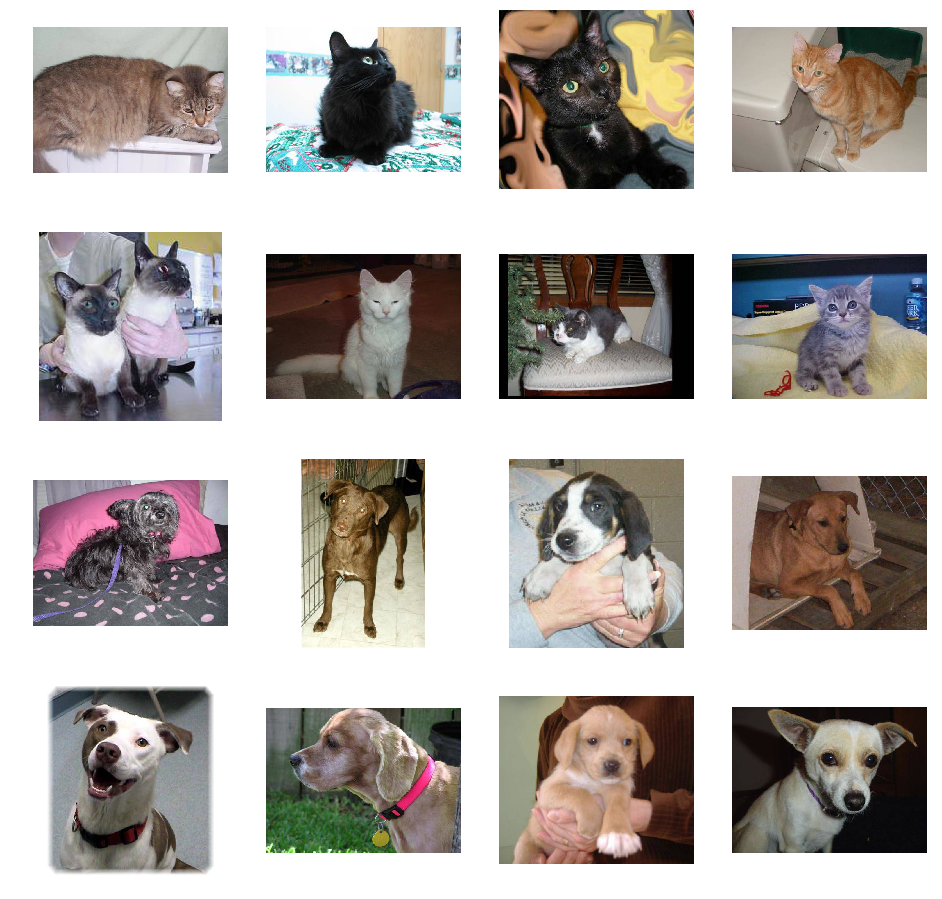

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Building a Small Convnet**

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

W0719 17:49:15.820838 139624172341120 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

W0719 17:49:16.209713 139624172341120 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Data Preprocessing**

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**Training**

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
100/100 - 61s - loss: 0.8127 - acc: 0.5615 - val_loss: 0.6769 - val_acc: 0.5630
Epoch 2/15
100/100 - 59s - loss: 0.6301 - acc: 0.6620 - val_loss: 0.6095 - val_acc: 0.6750
Epoch 3/15
100/100 - 59s - loss: 0.5578 - acc: 0.7235 - val_loss: 0.5954 - val_acc: 0.6680
Epoch 4/15
100/100 - 59s - loss: 0.4692 - acc: 0.7820 - val_loss: 0.5869 - val_acc: 0.7250
Epoch 5/15
100/100 - 59s - loss: 0.4054 - acc: 0.8225 - val_loss: 0.5936 - val_acc: 0.7100
Epoch 6/15
100/100 - 59s - loss: 0.3159 - acc: 0.8600 - val_loss: 0.6563 - val_acc: 0.7120
Epoch 7/15
100/100 - 59s - loss: 0.2425 - acc: 0.8880 - val_loss: 0.7604 - val_acc: 0.7230
Epoch 8/15
100/100 - 59s - loss: 0.1763 - acc: 0.9250 - val_loss: 0.8288 - val_acc: 0.7370
Epoch 9/15
100/100 - 59s - loss: 0.1367 - acc: 0.9475 - val_loss: 0.9554 - val_acc: 0.7110
Epoch 10/15
100/100 - 60s - loss: 0.0866 - acc: 0.9680 - val_loss: 1.2961 - val_acc: 0.7100
Epoch 11/15
100/100 - 60s - loss: 0.0900 - acc: 0.9685 - val_loss: 1.2504 - val_acc: 0.72